 <div style="text-align:center"><span style="color:Black; font-family:Georgia; font-size:3em;"> Finding a house in London</span></div>  
<p>
 <div style="text-align:center"><span style="color:Black; font-family:Georgia; font-size:1.5;"> IBM Professional Data Science Specialization Capstone</span></div>
 <p>
<div style="text-align:center"><span style="color:Black; font-family:Georgia; font-size:1em;"> Alexandros Spiliotis</span></div>

  
  
  
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/Palace_of_Westminster%2C_London_-_Feb_2007.jpg/1920px-Palace_of_Westminster%2C_London_-_Feb_2007.jpg"  width="400" height="1200" style="margin: 70px 0px 10px 30px;float:right" />
 
## Introduction

<p>As the trend of moving towards large cities, where the well-paying jobs are, continues, finding the right place to live at a city gets more and more difficult.
<p>The goal of this work is to create a useful tool for people who are considering moving to the Greater London Area and want to choose a suitable neighboorhood for them to move at.
<p> To achieve this, a cluster model is created that categorizes London neighborhoods on the basis of certain real-world parameters. The number of clusters, as well as the weights for each parameter, can be modified by the user.
<p> The parameters used are the following:

- Restaurants: In this category, all venues that are generally categorized as Restaurants, such as Italian or Japanese Restaurants, but also steakhouses and gastropubs.
- Food stalls: This category includes food places other than restaurants, such as burger joints, food stalls etc.
- Nightlife: Bars and Nightclubs.
- Stores: Supermarkets, convenient stores, but also department stores.
- Cafes: Coffee and tea houses and other kind of cafes.
- Art Venues: Art galleries, theaters and museums.
- Gyms: Gyms, spas, pools etc.
- Outdoors: Parks and game courts.
- Distance From Target: The distance from a specific location that the user will determine, be it their job, their University, the house of a relative etc.


## Data

<img src="https://cdn.londonandpartners.com/asset/harrods_harrods_d354ab9fb04891b3cd2c56ad97ef1b6f.jpg" style="margin: 65px 0px 10px 30px;float:right" width="400" height="1400"/>


### Housing prices per neighborhood

For this purpose, a dataset from data.london.gov.uk was used. The dataset contains median and mean house prices per 
neighborhood of the Greater London area, from December 1995 to December 2017, and the corresponding number of house sales. Data were recorded every trimester. As mentioned in the website, "...property prices (were) calculated by the GLA from Price Paid Data published on Land Registry website".  
<p>The dataset can be found at https://data.london.gov.uk/dataset/average-house-prices.


### London venues

To gather the venues of London, data from Foursquare API were downloaded, by calling all venues at a certain radius (default is 500 meters) from the center of each neighborhood.  

## Process

### Dataframe creation

First, we initialize the application, and create a dataframe with the following parameters:
    - Neighborhood name (Ward, Borough)
    - Median house value, in UK Pounds
    - Latitude and longitude of the neighborhood, given by calling the Google API of each neighborhood.
The housing values used for this purpose are current as of December 2017.



### Get London Venues

<img src="https://upload.wikimedia.org/wikipedia/commons/d/dc/Foursquare_logo.svg" width ="250" height= "500" style="margin: 50px 0px 10px 30px;float:right"/>

<p>In this step, the venues are imported from Foursquare.
<p>Due to the fact that the dataframe includes 630 neighborhoods, importing the dataframe is time-consuming. The program gives the option of importing the venues directly from a csv file, which has been created by running a short code that actually imports all venues from Foursquare. The user can select to do the whole process of importing the venues via Foursquare, by setting the "geolocation" parameter to 1, or to use the included csv file by setting the "geolocation" parameter to 0. 
<p> Note: The time needed for the data to be imported when "geolocation" is set to 1 is about 15 minutes for an i5 processor and 8 GB RAM. For this reason, it is recommended that "geolocation" is set to 0, except if the functionality of the code is to be tested.
    
<p>When this process is done, we will have a dataframe, the rows of which contain one venue per neighborhood, the coordinates of that venue, and its category, as given by Foursquare. Let us keep in mind that the venues are called for each neighborhood, which means that the same venue could be registered for more than one neighborhoods.



In [1]:
geolocate = 0

### Target Location  

The next step will be to give the model a target location. The default location will be Hammersmith Hospital, a major hospital in London. The user is encouraged to re-run the algorithm with other target locations.

Note: To avoid geolocation errors, please use "London, UK" in the end of any location. For example, instead of "Greenwich", which the API might as well geolocate in Canada(among other places), use "Greenwich, London, UK".

In [2]:
TargetAddress = 'Hammersmith Hospital, London,UK'

### K-means Clustering  
The program uses a k-means clustering algorithm to cluster London neighborhoods.  
We can specify the number of clusters for this process. The default is 8, but the user is encouraged to re-run the algorithm with other values.

In [3]:
NumberOfClusters = 8

### Weighted Values

<p>Since users tend to have different needs and tastes, we can modify the parameter weights so that the algorithm does not give a one-size-fits-all result, but a recommendation based on what the customer values more. For example, if someone does not really care about having fancy restaurants and dance clubs at walking distance, but is on a a tight budget and/or wants a short commute to his job, the algorithm weights can be modified so that the output is tailored to their needs. That practically means that the accuracy of the housing value and distance will be much better resolved than other parameters. 
<p>If all weights are equal, then the model is left to decide how the neighborhoods will be clustered. This might make it more difficult to understand what each cluster actually represents in the real world, but it would be more useful in a case when one, for example, wants to directly compare two cities' neighborhood geography.
For this model, the weights should range from 0.01 to 1.

In [4]:
weight_bars = 0.1 # Not really important - the customer does not like bars and/or can drive to the ones he like.
weight_restaurants = 0.1
weight_stores = 0.4 # It would be good to have a couple of convenience stores around.
weight_gyms = 0.1
weight_art= 0.1
weight_food = 0.1
weight_outdoors = 0.1
weight_cafe = 0.1
weight_value = 1 # Maximum importance
weight_distance = 0.7

In [5]:
# Create the weights list

weights = [weight_bars,
           weight_restaurants,
           weight_stores,
           weight_gyms,
           weight_art,
           weight_food, 
           weight_outdoors, 
           weight_cafe,
           weight_value,
           weight_distance]

### Run the process

Since we have initialized all parameters, our model is ready to run. 

In [6]:
import london_clustering_main as london
import seaborn as sns

In [7]:
model = london.LondonClustering(geolocate, TargetAddress, NumberOfClusters, weights)

Initializing Parameters...
Done!
Initializing Housing Values Dataframe...
Done!
Initializing Wards Dataframe...
100.0 % completed!
Neighborhood Coordinates Imported!
Exceptions Dropped!
Columns Dropped!
Importing Venues...
Done!
Initializing One-hot Dataframe...
Done!
Reshaping One-hot Dataframe...
Done!
Creating Clusters...
Done!
Process Completed!


Let's take a look at the complete dataframe. It contains 8 rows with venue categories, the median value of housing in the area, the distance from the target location in km, the number of the cluster to which it belongs, and the coordinates of the neighborhood. The column "Year" just shows the number 88 for all neighborhoods, which means that the housing value is current as of December 2017 (88 trimesters after the earliest value, March 1995).  

In [8]:
model.df_merged.head()

,Neighborhood,Nightlife,Restaurants,Cafes,Stores,Gyms,Art Venues,Food Stalls,Outdoors Activities,Value,Distance from Target,Cluster Labels,Latitude,Longitude,Year
0,"Abbey Road, Westminster",0,5,0,10,2,0,2,3,1032500.0,4.38,3,51.531949,-0.177218,88
1,"Abbey Wood, Greenwich",0,0,0,4,0,0,0,1,356000.0,24.48,0,51.487621,0.114050,88
2,"Abbey, Barking and Dagenham",0,2,0,6,2,2,3,1,231000.0,21.66,0,51.535688,0.075530,88
3,"Abbey, Merton",3,2,1,3,0,0,2,1,535000.0,12.14,7,51.411783,-0.194040,88
4,"Abingdon, Kensington and Chelsea",5,16,7,12,5,4,5,4,1686442.0,3.37,3,51.499453,-0.197325,88


### Clusters map

<p>Now let's map the London neighborhoods that we have imported.  
<p>Below is a map of 581 London neighborhoods, categorized by the k-means model in specific clusters. Each point represents a neighborhood, and is located inside the neighborhood. Points are color-coded to show that they belong to a specific cluster. <p>We can not know yet what the characteristics of each cluster are; we will have to analyze and visualize our data to obtain a clear picture of that. Based on what we know about London (and large metropolitan areas in general), though, we can make some observations which can give us some insight on how the model works.

In [9]:
model.show_clusters_map()

### Insight gained by mapping the clusters

<p>Just by looking at the map, a first observation we can make is the following. The algorithm separates the neighborhoods by their distance from the City Center. For the default conditions, there should be at least 3 clusters that include neighborhoods away from the center.</p>   
<p>That is expected, since we expect the vibrant, densely populated central neighborhoods to be separated from the more calm and sparsely populated suburbs, as the former will show many more venues than the latter, and their values are much higher. 
<p>Thus for a number of clusters up to 3-4, the cluster that the neighborhood will belong to is basically determined by its distance from the city center. That is unless the distance to target is disproportionately weighted compared to other parameters, and away from the center. In that case, the clusters will be concentric circles around the target. 
<p>As the number of clusters increases, the clusters show the differences between neighborhoods. First, new clusters emerge close to the city center, where fluctuations in value and number of venues are relatively high. For clusters >10, the corresponding fluctuations at the suburbs are also depicted.
<p>The target location also plays an important role, when the "distance" weight is not negligible. 
If the target location lies close to the center, all suburbs around London tend to belong to the same cluster, since their distance from the target, as well as the number of venues there are similar. If, though, the target location lies away from the center, it looks like a new center of gravity emerges around it.  
<p>Of course, this is only a qualitative appraisal of our data. It is nevertheless important to show what a powerful tool mapping is, as a complement to machine learning. As we will see, the data visualization process will give us more details, but the main idea that we got by just looking at the map is correct.

### Visualization and Analysis of data

*------------------------------------------------------------------*

We shall now visualize the data by category, in order to draw more accurate and quantitative conclusions. The comments are on the results that the model gives when the default parameters are passed.

#### Housing Value


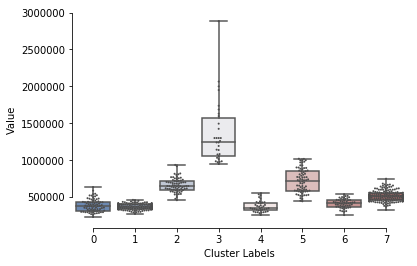

In [10]:
model.plot_data("Value",'box',True)

Due to the high weight of the housing value parameter, clusters are well distinguished in terms of that parameter. For the default conditions, one cluster includes the very expensive houses, mostly located at Westminster and Chelsea, as shown below in the dataframe. The rest of the clusters are made of neighborhoods with low (x < 500k) and intermediate (500k < x < 1M) prices. All clusters are distinguished in terms of median values, and have relatively low dispersion.
<p> Let us take a look at this cluster (default for the selected seed is #3. If it is not, just replace number 3 with the cluster with the higher value) :

In [11]:
model.show_clusters_data(3).head()

,Neighborhood,Nightlife,Restaurants,Cafes,Stores,Gyms,Art Venues,Food Stalls,Outdoors Activities,Value,Distance from Target,Cluster Labels,Latitude,Longitude,Year
0,"Abbey Road, Westminster",0,5,0,10,2,0,2,3,1032500.0,4.38,3,51.531949,-0.177218,88
4,"Abingdon, Kensington and Chelsea",5,16,7,12,5,4,5,4,1686442.0,3.37,3,51.499453,-0.197325,88
19,"Barnes, Richmond upon Thames",1,3,1,6,0,0,4,2,1240000.0,5.11,3,51.471896,-0.238744,88
64,"Brompton and Hans Town, Kensington and Chelsea",5,16,7,12,5,4,5,4,2000000.0,3.37,3,51.499453,-0.197325,88
72,"Bryanston and Dorset Square, Westminster",9,34,5,23,5,0,5,5,1055000.0,3.41,3,51.512414,-0.187632,88


We can see that all neighborhoods are located at the wards of Chelsea, Westminster, Fulham and Richmond-upon-Thames, which are the affluent London areas. These areas are also relatively close to the Hammersmith Hospital.
<p> Let's now take a look at cluster 1, which only includes houses with values < 500k.

In [12]:
model.show_clusters_data(1).head()

,Neighborhood,Nightlife,Restaurants,Cafes,Stores,Gyms,Art Venues,Food Stalls,Outdoors Activities,Value,Distance from Target,Cluster Labels,Latitude,Longitude,Year
6,"Addiscombe, Croydon",1,2,1,7,0,0,1,2,369995.0,19.02,1,51.379692,-0.074282,88
13,"Ashburton, Croydon",0,2,0,4,0,0,0,1,430000.0,18.89,1,51.385303,-0.065751,88
21,"Barnhill, Hillingdon",0,0,0,0,0,0,0,1,367500.0,13.37,1,51.587931,-0.393098,88
24,"Beckton, Newham",1,0,0,8,1,0,0,2,380000.0,20.46,1,51.516080,0.059426,88
26,"Beddington North, Sutton",1,1,0,1,0,0,0,1,390000.0,17.74,1,51.371988,-0.132393,88


For cluster 1, most neighborhoods are located at the southern towns of Croydon and Sutton which still retain house values at the low numbers, even though they are growing.

#### Distance From Target


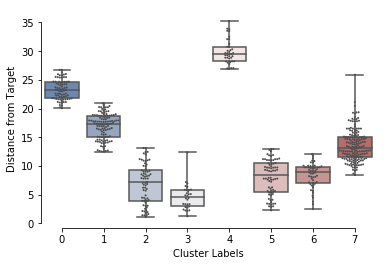

In [13]:
model.plot_data("Distance from Target",'box', True)

Distance also gives well-distinguished clusters, although not as well as the housing value. Nevertheless, we can already draw some conclusions about the characteristics of the clusters.
<p> Cluster 3 includes houses that are very close to our target, but, as we know from the previous plot, they are also the most expensive in the city. 
<p> Clusters 1 and 4 include neighborhoods located away from the Hammersmith Hospital and the city center, and also have low values.
<p> Clusters 2, 5 and 6 combine proximity to the target and relatively low housing values. This is because they include neighborhoods located at the western and north-western London suburbs. If these two are the parameters that the user cares the most about, these clusters look like the best options.

In [14]:
model.show_clusters_data(2).head()

,Neighborhood,Nightlife,Restaurants,Cafes,Stores,Gyms,Art Venues,Food Stalls,Outdoors Activities,Value,Distance from Target,Cluster Labels,Latitude,Longitude,Year
5,"Acton Central, Ealing",3,0,1,5,4,0,0,1,557000.0,2.10,2,51.508716,-0.262807,88
7,"Addison, Hammersmith and Fulham",5,11,3,10,2,1,4,2,616800.0,2.27,2,51.501805,-0.215851,88
9,"Alexandra, Haringey",1,0,1,0,1,0,1,6,936057.0,11.20,2,51.594222,-0.130857,88
14,"Askew, Hammersmith and Fulham",3,11,1,19,0,0,3,0,576000.0,1.43,2,51.505610,-0.243096,88
15,"Avonmore and Brook Green, Hammersmith and Fulham",3,11,1,19,0,0,3,0,610000.0,1.43,2,51.505610,-0.243096,88


In [15]:
model.show_clusters_data(6).head()

,Neighborhood,Nightlife,Restaurants,Cafes,Stores,Gyms,Art Venues,Food Stalls,Outdoors Activities,Value,Distance from Target,Cluster Labels,Latitude,Longitude,Year
12,"Alperton, Brent",1,3,1,4,2,0,4,0,347500.0,4.82,6,51.537768,-0.297924,88
20,"Barnhill, Brent",0,1,1,1,0,0,1,0,471250.0,5.32,6,51.562008,-0.265511,88
41,"Bishop's, Lambeth",6,6,2,4,5,2,1,10,360000.0,9.16,6,51.493497,-0.109770,88
55,"Brentford, Hounslow",0,1,0,5,2,1,2,0,500000.0,6.87,6,51.486396,-0.321662,88
74,"Burnt Oak, Barnet",0,0,0,4,0,0,1,0,375000.0,9.90,6,51.604988,-0.264450,88


#### Stores

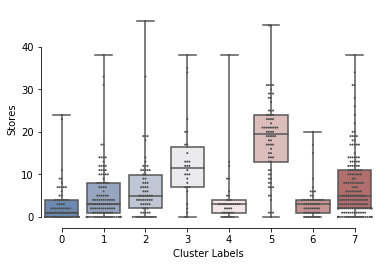

In [16]:
model.plot_data("Stores",'box', True)

The weight that we gave for stores was just 0.4, which is enough to distinguish one or two clusters (#3 and #5) with the most stores, but all others show a large variation. 
<p> Clusters 3 and 5 include the western districts of Hammersmith, Westminster and Chelsea, where one can find many places for shopping.

### Restaurants, NightLife, Food Stalls  and Art Venues

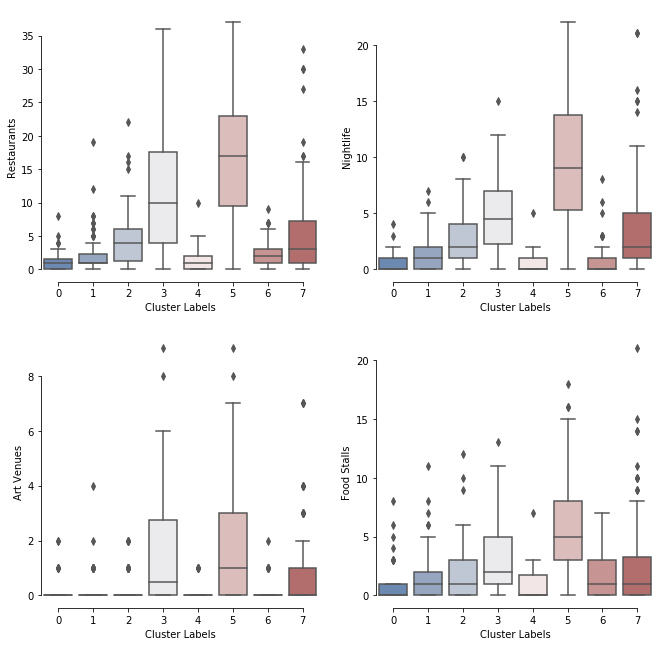

In [17]:
params = ["Restaurants","Nightlife","Art Venues","Food Stalls"]
model.plot_multiple(params)

Because of the low weights that we assigned to these parameters, the variance is high. We can nevertheless spot the hip central areas, because that is where the most of these venues will be found, and these are clusters 3 and 5. All other clusters have virtually no theaters and museums (these are all located deep inside the city center), and fewer restaurants, food stalls and bars. 
<p> After all, it looks like all these parameters are correlated with housing value, which is correlated with the distance from the city center. Let us try to confirm this conclusion, by quantifying the correlation between our parameters.

### Correlation

In [18]:
df_corr = model.df_grouped_clustering.corr()

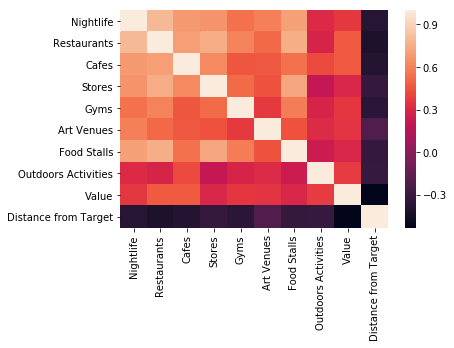

In [19]:
sns.heatmap(df_corr)

Here we see a heatmap of all the parameters that we considered for our model. 
<p>The dark columns show the anticorrelation (weak or stronger) of all parameters with the distance from our target. This is another way of saying "the farthest from the city center we go, the fewest things we will find, but also, houses are cheaper". Most large European cities are made this way, with only a few exceptions, such as Athens, Greece, where houses in the suburbs are generally more expensive than houses at the center. 
<p> On the other hand, bars, restaurants, food stalls and cafes show high correlation with each other, which means that a neighborhood has either many or few of all of them. 
<p> This might have also to do with the following parameter. Since we used Foursquare to obtain the venues of London, we can expect venues far away from the historic center to be much more hardly recorded than the ones at the historic center. This is because Foursquare mostly obtains its data from check-ins that tourists do, and we can expect tourists to not lurk too far away from the center. Thus, many venues at the suburbs are not on Foursquare, and thus we don't have them. 
<p> Even if this affects the quality of Foursquare data, our general conclusions are safe, because London suburbs are mostly residential areas, without highly-developed commercial zones.
<p> A small, yet interesting detail is that restaurants are more positively correlated with housing value than food stalls. This shows that we separated the two categories effectively: one had the fancy restaurants that raise the value of an area, or would only open at an affluent area, whereas the other includes sandwich spots and burger joints, which can be found virtually everywhere. 

### Housing value trend

Another tool that this work can offer is the insight on the housing value trends. This is an important tool, because it could help the user spot whether a neighborhood follows the trend that the market sets, or whether there is any peculiar trend about that specific neighborhood. For example, a recent steep decrease of the housing value could signify that something is wrong in that neighborhood (e.g. high crime), whereas a larger-than-average increase would mean the this is an upcoming neighborhood, which would make it ideal to invest on a house there.

Below is a list with all the neighborhood names ("model.list_neigh"). The plotting function can take either full neighborhood names or indices of "model.list_neigh" as an argument. In principle, an arbitrary number of neighborhoods can be plotted.

In [20]:
model.list_neigh.head()

0          City of London, City of London
1             Abbey, Barking and Dagenham
2            Alibon, Barking and Dagenham
3         Becontree, Barking and Dagenham
4    Chadwell Heath, Barking and Dagenham
Name: Neighborhood, dtype: object

Let's plot the following neighborhoods:
- Abbey Road, Westminster, cluster 3, valued at ~1M
- Beddington North, Sutton, cluster 1, valued at ~390k
- Beddington South, Sutton, cluster 1, valued at ~390k
- Totteridge, Barnet, cluster 7, valued at ~550k
- Childs Hill, Barnet, cluster 2, valued at ~640k
- Belvedere, Bexley, cluster 0, valued at ~280k

In [23]:
NeighborhoodsToWatch = ["Beddington South, Sutton",
                        "Beddington North, Sutton",
                        "Totteridge, Barnet",
                        "Childs Hill, Barnet",
                        "Abbey Road, Westminster",
                        "Belvedere, Bexley"
                       ]

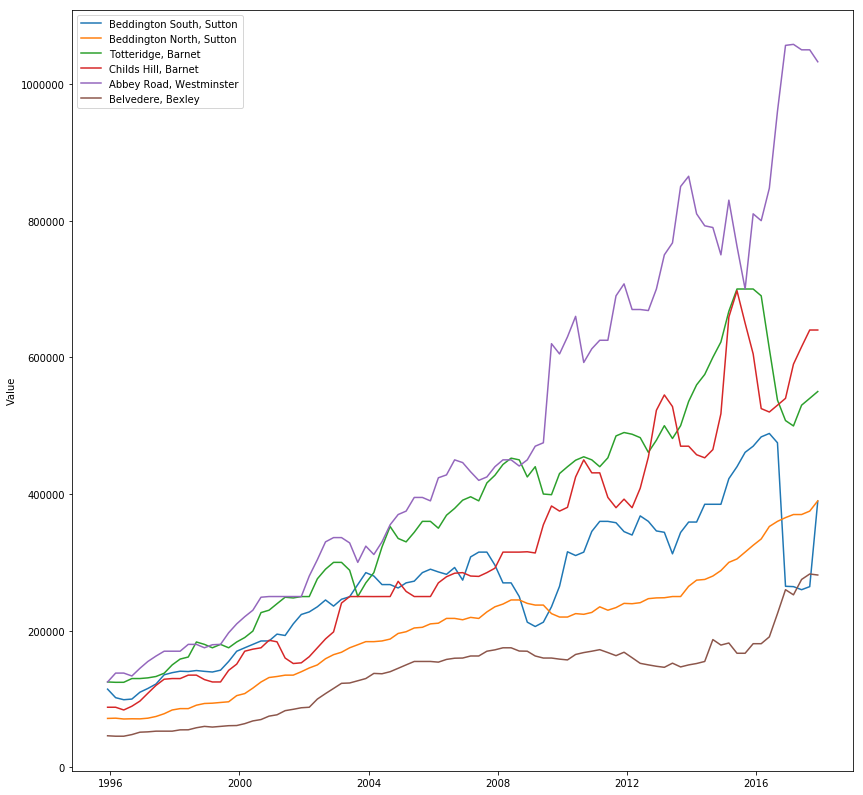

In [24]:
model.show_price_evolution(NeighborhoodsToWatch)

Let's discuss what we see in that plot. 
- Abbey Road, Westminster, is very affluent and housing value there increases continuously. In 20 years, housing value has increased 20-fold(!)
- Beddington South and North happen to have the same median housing value, but there are considerable differences between the trend of the housing prices there. Beddington North values are rising continuously, with the exception of some stagnancy around the recession, from which prices recovered not only their absolute values, but also their pre-recession increase rate. Beddington North, on the other hand, always had larger housing values than South, but on 2016, something happened that triggered a ~50% decrease of housing values. The cause of this abrupt decreseshould to be researched by anyone interested in buying property there.
- The two Barnet neighborhoods, Totteridge and Childs Hill saw a simultaneous decrease at their house values around the same time that Beddington North did. The difference between them, though, is that Childs Hill prices show large fluctuations since the recession.
- Belvedere, Bexley has a relatively low absolute median house value, but prices there are increasing since 2016. This could mean that it would be a good opportunity to buy a house there at this time.

## Conclusion

In this work, I presented a simple and agile tool for locating a suitable neighborhood to buy a house, or comparing cities with each other in terms of neighborhood geography, affluency, venues distribution, and housing value trend. The following conclusions were drawn for London:
- If the data from Foursquare can be considered accurate and complete, a strong correlation between the proximity to the city center and housing value has been found. Also, most important venues in London are located at the city center.
- For someone who values a short commute to their job and an affordable house price, houses just outside the city center, at neighborhoods such as Brent, Ealing or Harrow, would be very suitable. These particular neighborhoods are located closer to our default target location, Hammersmith Hospital, but one can find affordable houses around any spot, with a 15-30 min commute (~10-20 km).
- Unfortunately, our model does not include other real-world parameters, such as crime rate, pollution and others. For the scope of this assignment, it was deemed unnecessary to delve so deep, because this would need more current data, which are generally difficult to obtain. This can be considered though, for the improvement of the model.
- Another improvement of the model would be a normalization of the number of venues by population or neighborhood area. It would be obvious that neighborhoods with a fraction of the population of Chelsea would have a fraction of the cafes and restaurants, too, but we haven't shown that with this model.